# Small Image Classification Using Simple Aritifical Neural Network: GPU Benchmarking

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

Dataset - https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
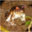

In [ ]:
X_train[0]

In [ ]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
def plot_sample(index):
  plt.figure(figsize = (10,1))
  plt.imshow(X_train[index])

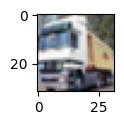

In [ ]:
plot_sample(1)

In [ ]:
classes = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
y_train[3]

array([4], dtype=uint8)

In [ ]:
classes[y_train[3][0]]

'deer'

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
#Usig API we done ONEHOTENCODING
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype = 'float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype = 'float32'
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation= "relu"),
    keras.layers.Dense(1000,activation= "relu"),
    keras.layers.Dense(10,activation= "sigmoid")
])
model.compile(optimizer = 'SGD',loss='categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train_categorical, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8089 - accuracy: 0.3536
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6207 - accuracy: 0.4292
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5396 - accuracy: 0.4579
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4783 - accuracy: 0.4801
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4278 - accuracy: 0.4972
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3859 - accuracy: 0.5126
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3479 - accuracy: 0.5248
Epoch 8/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3140 - accuracy: 0.5376
Epoch 9/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2821 - accuracy: 0.5485
Epoch 10/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.25

In [ ]:
model.predict(X_test_scaled)

313/313 [==============================] - 1s 2ms/step


array([[3.2701737e-01, 8.6796828e-02, 7.8147900e-01, ..., 8.0618163e-04,
        7.6872367e-01, 1.7166615e-01],
       [9.7858411e-01, 9.9072307e-01, 4.2172542e-01, ..., 8.1597972e-01,
        9.9982423e-01, 9.9724293e-01],
       [9.5293415e-01, 4.7926351e-01, 8.1188297e-01, ..., 9.8977613e-01,
        9.9424100e-01, 7.5807732e-01],
       ...,
       [3.0495900e-01, 1.0620327e-03, 9.9799782e-01, ..., 9.5258743e-01,
        5.1235890e-01, 2.2448164e-01],
       [5.3548485e-01, 8.8790134e-03, 5.7779008e-01, ..., 6.8959016e-01,
        1.5508093e-01, 3.1318966e-02],
       [9.1010928e-03, 5.8193970e-03, 9.6026170e-01, ..., 9.9938798e-01,
        1.6794920e-02, 2.8052139e-01]], dtype=float32)

In [ ]:
classes[y_test[0][0]]

'cat'

In [ ]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 1s 2ms/step


3

In [ ]:
np.argmax(model.predict(X_test_scaled)[1])

313/313 [==============================] - 1s 3ms/step


8

In [ ]:
classes[y_test[1][0]]

'ship'

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_4 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_5 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12230010 (46.65 MB)
Trainable params: 12230010 (46.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.5207 - accuracy: 0.5650


[1.5207105875015259, 0.5649999976158142]

In [ ]:
#Performance Test

def get_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation= "relu"),
    keras.layers.Dense(1000,activation= "relu"),
    keras.layers.Dense(10,activation= "sigmoid")
])
  model.compile(optimizer = 'SGD',loss='categorical_crossentropy',metrics = ['accuracy'])
  return model

## Lets measure training time on CPU and GPU

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 142s 90ms/step - loss: 1.8140 - accuracy: 0.3546
2min 25s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.8110 - accuracy: 0.3560
10.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled, y_train_categorical, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 131s 83ms/step - loss: 1.8083 - accuracy: 0.3551
Epoch 2/10
1563/1563 [==============================] - 123s 79ms/step - loss: 1.6207 - accuracy: 0.4289
Epoch 3/10
1563/1563 [==============================] - 121s 78ms/step - loss: 1.5395 - accuracy: 0.4566
Epoch 4/10
1563/1563 [==============================] - 122s 78ms/step - loss: 1.4788 - accuracy: 0.4809
Epoch 5/10
1563/1563 [==============================] - 123s 78ms/step - loss: 1.4323 - accuracy: 0.4973
Epoch 6/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.3890 - accuracy: 0.5100
Epoch 7/10
1563/1563 [==============================] - 124s 79ms/step - loss: 1.3508 - accuracy: 0.5241
Epoch 8/10
1563/1563 [==============================] - 123s 79ms/step - loss: 1.3180 - accuracy: 0.5361
Epoch 9/10
1563/1563 [==============================] - 127s 81ms/step - loss: 1.2836 - accuracy: 0.5469
Epoch 10/10
1563/1563 [==============================] 

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled, y_train_categorical, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8123 - accuracy: 0.3561
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6236 - accuracy: 0.4275
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5448 - accuracy: 0.4550
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4836 - accuracy: 0.4758
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4338 - accuracy: 0.4952
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3916 - accuracy: 0.5095
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3535 - accuracy: 0.5250
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3173 - accuracy: 0.5354
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2845 - accuracy: 0.5515
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.252

| Epochs |   CPU     |  GPU  |
|:-------|:----------|:------|
|   1    | 2min.25s  |  10s  |
|   10   | 20min 47s | 1min 24s |